In [1]:
#Importing the basic Python Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Importing the training data
train_data = pd.read_csv('train.csv')

In [5]:
#Visualizing the data in pixel format
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#Converting this data frame into NumPy array
train_data = np.array(train_data)
m, n = train_data.shape
print(train_data.shape)

(42000, 785)


In [9]:
#Extracting the X and y from train_data
X_train = train_data[:, 1:n]
print('X_train shape: ', X_train.shape)
X_train = X_train / 255    #Normalizing X by scaling it down to [0,1]
y_train = train_data[:, 0]
print('y_train shape: ', y_train.shape)
print(y_train.size)
print(y_train.max())

X_train shape:  (42000, 784)
y_train shape:  (42000,)
42000
9


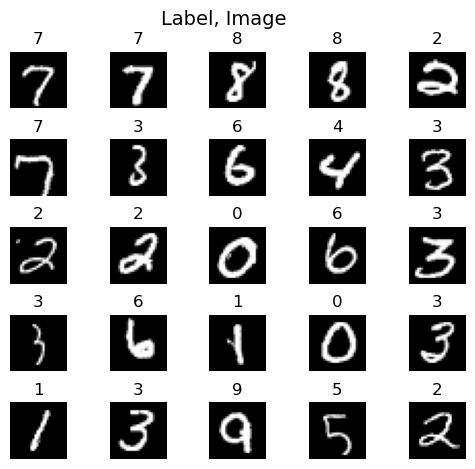

In [11]:
#Visualizing random 25 examples
m,n = X_train.shape
fig, axes = plt.subplots(5,5, figsize = (5,5))
fig.tight_layout(pad = 0.13, rect = [0, 0.03, 1, 0.91])
for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_reshaped = X_train[random_index].reshape((28,28))*255
    ax.imshow(X_reshaped, cmap = 'gray')
    ax.set_title(y_train[random_index])
    ax.set_axis_off()
    fig.suptitle("Label, Image", fontsize = 14)

Neural Network Architecture:

1. Input Layer of array = 42000 x 784
2. Hidden Layer 1: relu activation; 25 units; W1.shape = (42000, 25); b1.shape = (25,)
3. Hidden Layer 2: relu activation; 15 units; W2.shape = (25, 15)   ; b2.shape = (15,)
4. Output Layer  : softmax activation; 10 units; W3.shape = (15,10)  ; b3.shape = (10,)

In [14]:
#Initializing Parameters Randomly
def init_params():

    w1 = np.random.rand(25, 784) - 0.5
    b1 = np.zeros((25,1))

    w2 = np.random.rand(15, 25) - 0.5
    b2 = np.zeros((15,1))

    w3 = np.random.rand(10, 15) - 0.5
    b3 = np.zeros((10,1))

    return w1, b1, w2, b2, w3, b3

Forward Prop Begins

In [17]:
#Defining the ReLU activation function
def relu(z):
    return np.maximum(z, 0)

In [19]:
#Defining the Softmax activation function
def softmax(Z):
    #A = np.exp(Z) / sum(np.exp(Z))
    Z_shift = Z - np.max(Z, axis = 0, keepdims = True)
    exp_Z = np.exp(Z_shift)
    return exp_Z/ np.sum(exp_Z, axis = 0, keepdims = True)

In [21]:
#Defining Forward Propagation
def forward_prop(w1, b1, w2, b2, w3, b3, X, is_batch = True):
    if is_batch:
        X = X.T
    z1 = w1.dot(X) + b1
    a1 = relu(z1)
    z2 = w2.dot(a1) + b2
    a2 = relu(z2)
    z3 = w3.dot(a2) + b3
    a3 = softmax(z3)

    return z1, a1, z2, a2, z3, a3

Back Prop Begins

In [24]:
# One-Hot Encoding of Y from 1D to 2D numpy array.
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [26]:
#Finiding the derivative of ReLU function.
def deriv_ReLU(Z):
    return Z>0

In [28]:
#Defining Back Propagation
def back_prop(z1, a1, z2, a2, w2, z3, a3, w3, Y, X):
    OneHot_Y = one_hot(Y)
    #print(OneHot_Y.shape)

    #Output Layer (Softmax + Cross Entropy Derivative)
    dZ3 = a3 - OneHot_Y
    dW3 = 1/m * dZ3.dot(a2.T)
    db3 = 1/m * np.sum(dZ3)

    #Layer 2 (ReLU)
    dA2 = w3.T.dot(dZ3)
    dZ2 = dA2 * deriv_ReLU(z2)
    dW2 = 1/m * dZ2.dot(a1.T)
    db2 = 1/m * np.sum(dZ2)

    #Layer 1 (ReLU)
    dA1 = w2.T.dot(dZ2)
    dZ1 = dA1 * deriv_ReLU(z1)
    dW1 = 1/m * dZ1.dot(X)
    db1 = 1/m * np.sum(dZ1)

    return dW1, db1, dW2, db2, dW3, db3

In [30]:
#Function to update parameters, required for Gradient Descent
def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3
    
    return W1, b1, W2, b2, W3, b3

In [32]:
#Function that gets the prediction
def get_pred(a3):
    return np.argmax(a3, axis = 0)

In [34]:
#Function to compute the cost of the model
def compute_cost(a3, Y):
    OneHot_Y = one_hot(Y)
    m = OneHot_Y.shape[1]
    cost = -np.sum(OneHot_Y * np.log(a3 + 1e-8)) / m
    return cost

In [36]:
#Function to compute the gradient descent of the model
def gradient_descent(X, Y, iterations, alpha):
    w1, b1, w2, b2, w3, b3 = init_params()
    for i in range(iterations):
        z1, a1, z2, a2, z3, a3 = forward_prop(w1, b1, w2, b2, w3, b3, X, is_batch = True)
        dW1, db1, dW2, db2, dW3, db3 = back_prop(z1, a1, z2, a2, w2, z3, a3, w3, Y, X)
        w1, b1, w2, b2, w3, b3 = update_params(w1, b1, w2, b2, w3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i%10 == 0:
            print("Iteration: ", i)
            print("Cost: ", compute_cost(a3, Y))
    return w1, b1, w2, b2, w3, b3

In [38]:
#Training the model by finding the appropriate model parameters
w1, b1, w2, b2, w3, b3 = gradient_descent(X_train, y_train, 5000, 0.1)

Iteration:  0
Cost:  2.6287683269629825
Iteration:  10
Cost:  2.2197266107651314
Iteration:  20
Cost:  2.064675968153114
Iteration:  30
Cost:  1.889621270359481
Iteration:  40
Cost:  1.6910416948269478
Iteration:  50
Cost:  1.4909607554507887
Iteration:  60
Cost:  1.3199465531254024
Iteration:  70
Cost:  1.1865651529275596
Iteration:  80
Cost:  1.0828800436993558
Iteration:  90
Cost:  0.9994709617683882
Iteration:  100
Cost:  0.9302699679304318
Iteration:  110
Cost:  0.8719283942783415
Iteration:  120
Cost:  0.8222998879238155
Iteration:  130
Cost:  0.7802493443089423
Iteration:  140
Cost:  0.7443475677885917
Iteration:  150
Cost:  0.7136312782332779
Iteration:  160
Cost:  0.6869844180937007
Iteration:  170
Cost:  0.663536870840044
Iteration:  180
Cost:  0.6427025362735316
Iteration:  190
Cost:  0.6240851114356931
Iteration:  200
Cost:  0.6072604668005588
Iteration:  210
Cost:  0.5920437687900135
Iteration:  220
Cost:  0.5781540657656499
Iteration:  230
Cost:  0.5655163261996192
Iterat

In [40]:
#Function to make prediction.
def make_pred(X, W1, b1, W2, b2, W3, b3):
    _,_,_,_,_,A3 = forward_prop(W1, b1, W2, b2, W3, b3, X, is_batch = False)
    predictions = get_pred(A3)
    return predictions

In [42]:
#Loading the test-data and converting it into NumPy array
test_data = pd.read_csv('test.csv')
X_test = np.array(test_data)
X_test.shape

(28000, 784)

In [44]:
#Visualizing this test-data
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
#Function to customize the appearance of interactive Matplotlib plots.
def widgvis(fig):
    fig.canvas.toolbar_visible = False    #Hides the toolbar
    fig.canvas.header_visible = False     #Hides the figure header
    fig.canvas.footer_visible = False     #Hides the footer

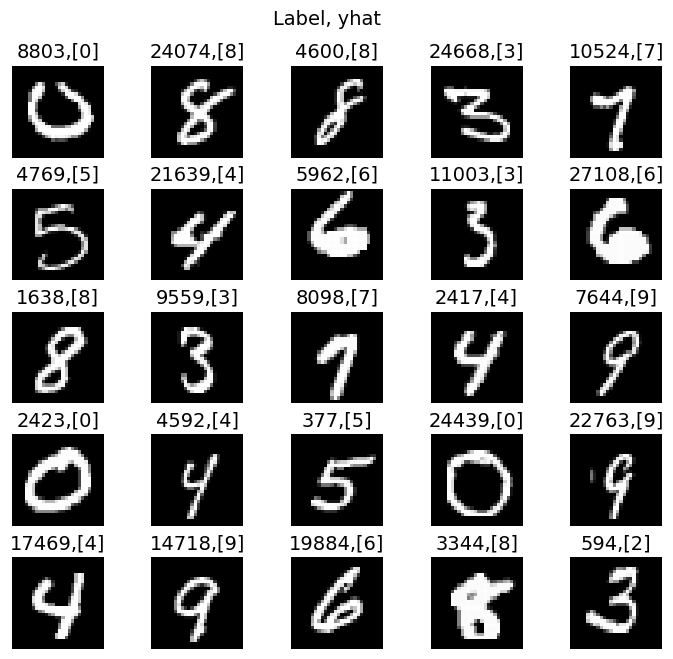

In [48]:
#Testing our model using the test-data.
#Note:- Only 100 test-data examples are used at a time to prevent exhausting local resources.
# So we use: 100 "RANDOM" examples each time.

m, n = X_test.shape
fig, axes = plt.subplots(5, 5, figsize = (7,7))
fig.tight_layout(pad = 0.13, rect = [0, 0.03, 1, 0.91])
widgvis(fig)
for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X_test[random_index].reshape((28, 28))
    ax.imshow(X_random_reshaped, cmap = 'gray')
    prediction = make_pred(X_test[random_index].reshape(784,1), w1, b1, w2, b2, w3, b3)
    ax.set_title(f"{random_index},{prediction}", fontsize = 14)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize = 14)
plt.show()

In [50]:
def get_predictions_on_test(X_test, w1, b1, w2, b2, w3, b3):
    predictions = []
    for i in range(X_test.shape[0]):
        x = X_test[i].reshape(-1, 1)
        pred = make_pred(x, w1, b1, w2, b2, w3, b3)
        predictions.append(pred)
    return np.array(predictions).flatten()
    

In [52]:
predictions = get_predictions_on_test(X_test, w1, b1, w2, b2, w3, b3)

In [54]:
submission = pd.DataFrame({
    "ImageId": np.arange(1, len(predictions) + 1),
    "Label": predictions
})

submission.to_csv("mnist_submission.csv", index=False)